# Decision/Regression Trees
Decision trees are binary classification models that split data at decision nodes based on conditions, with leaf nodes making final predictions. If data is complex and the leaves are not purely one class or the other, leaves predict by majority class. In regression trees, leaves predict new classifications using the average y-value of their training data.

[Insert image]

The dataset we're using classifies people as either having cardiovascular disease or not. Thus, we are using the decision tree algorithm for binary classification.

In [16]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Load the data
health_data = pd.read_csv("health_data.csv")  # adjust path if needed

# Drop unnecessary columns
health_data = health_data.drop(columns=["Unnamed: 0", "id"])

health_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


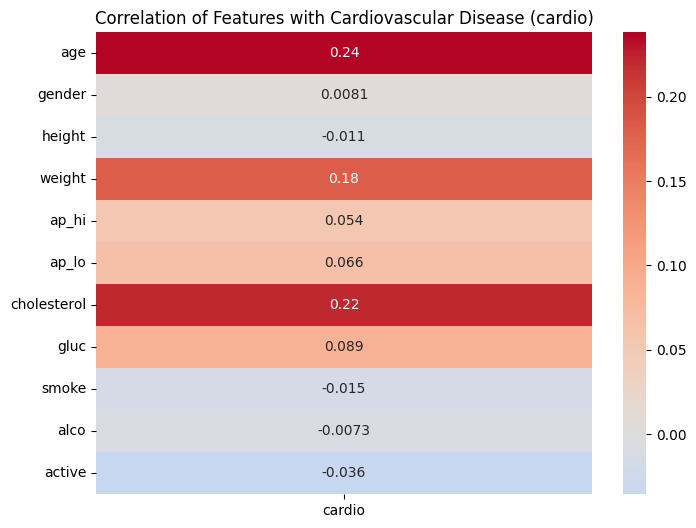

In [14]:
# Calculate correlation of all features with the 'cardio' column
correlations_with_cardio = health_data.corr()['cardio'].drop('cardio')

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlations_with_cardio.to_frame(), 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            cbar=True)

plt.title('Correlation of Features with Cardiovascular Disease (cardio)')
plt.show()

While the visualizations shows weak correlations between features and the target, regression trees can capture nonlinear relationships that may not be reflected here, so let us move onto implementing the model.

Accuracy: 0.7346

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.76      0.68      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



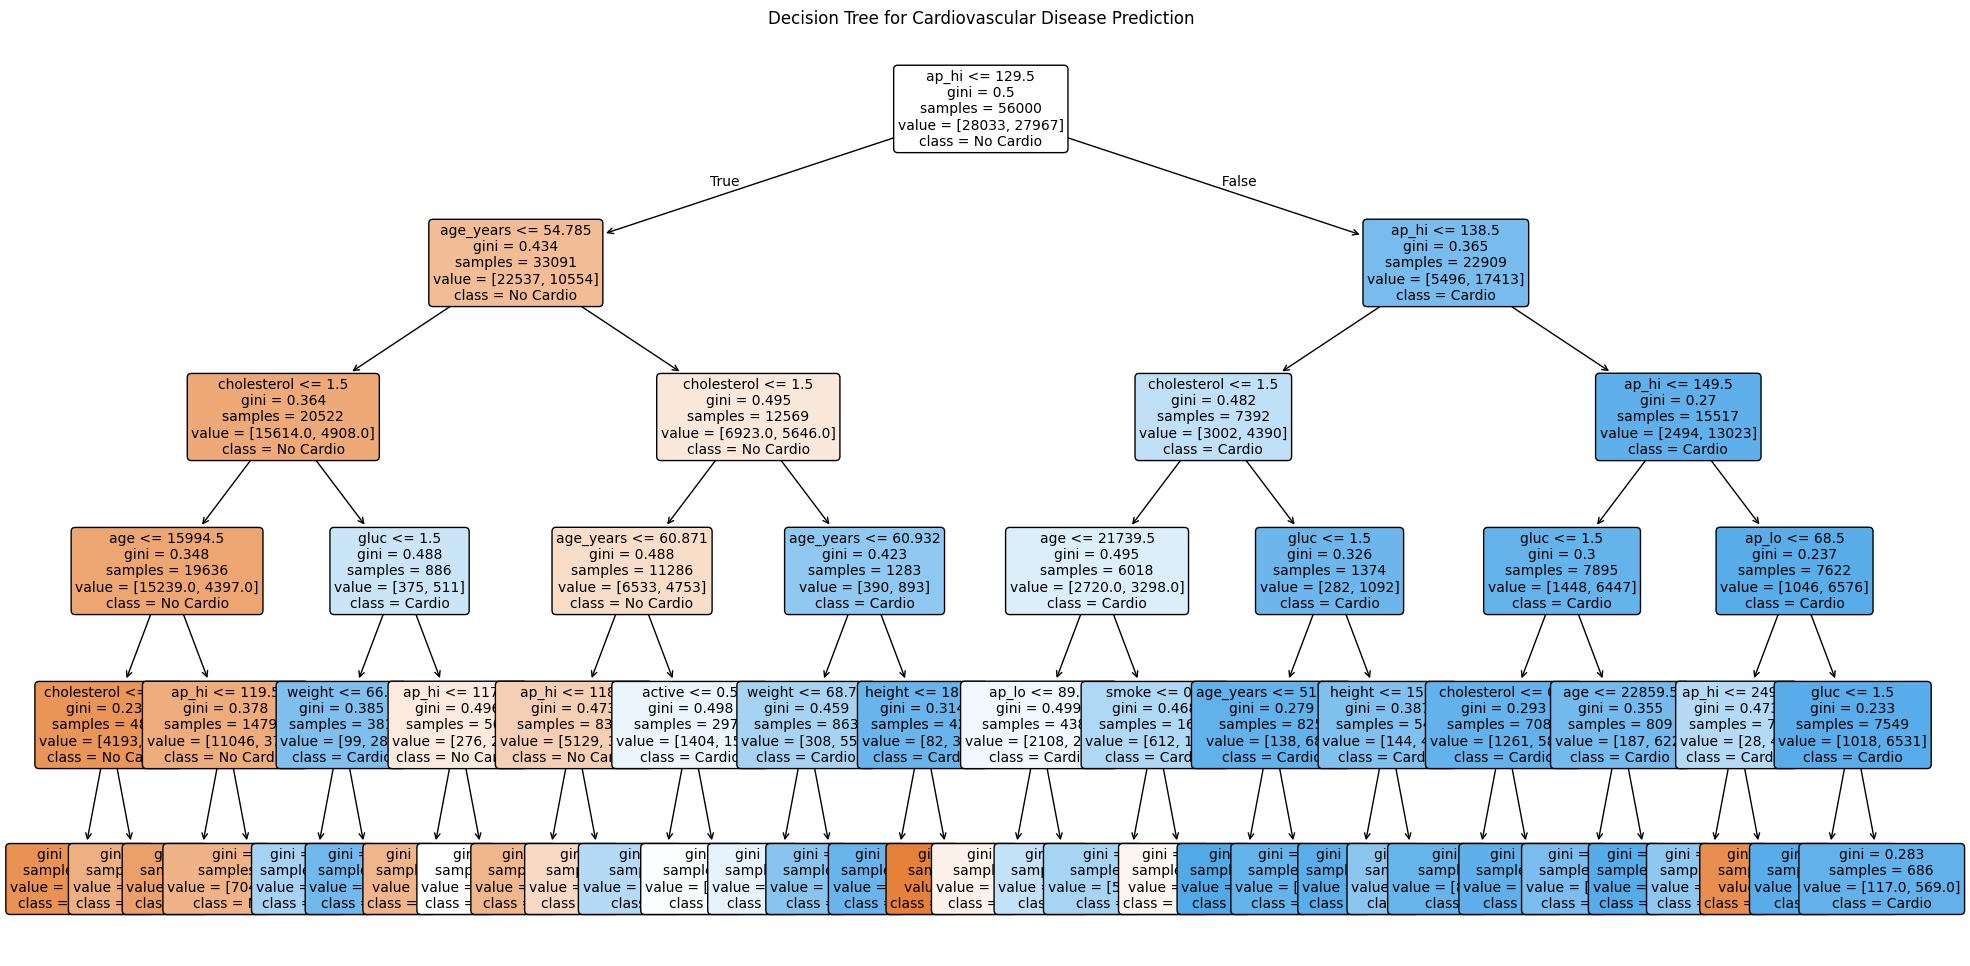

In [ ]:
# Prepare features and target
X = health_data.drop(columns=["cardio"])
y = health_data["cardio"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(24, 12))
plot_tree(clf, feature_names=X.columns, class_names=["No Cardio", "Cardio"], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Cardiovascular Disease Prediction")
plt.show()

Accuracy: 0.7346

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.76      0.68      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



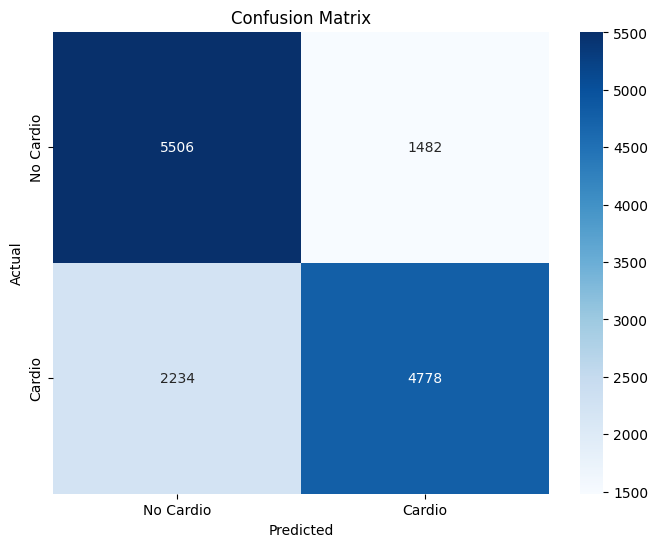

In [18]:
# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=["No Cardio", "Cardio"],
                 yticklabels=["No Cardio", "Cardio"])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()